## Problem Solving In Industry

### Project: Menu Assistance 

Kelly and Leo

###   Table of Contents:<a name="b"></a>


0. [Importing the required libraries for EDA](#0)
1. [Business Understanding ](#1)
2. [Data Undertanding](#2)                     
    2.1. [Loading the data into the Data Frame](#2.1)             
3. [Data Preparation](#3)
4. [Modelling](#4)

---
## Importing libraries to be used in the project<a name="0"></a>
----

In [1]:
#libraries to be used in the project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

----
## 1. Business understanding<a name="1"></a>
-----
In this phase of the CRISP-DM process will be to determine the business objectives of our project, we will evaluate the aspects of the situation to produce the project plan, and from this which tools, datasets and machine learning will be used.
Our business proposal is to help chefs to create dishes for their restaurants with more accuracy and higher probability to be ordered by their customers. 
The main business goal of our project is to predict what ingredients customers would like to eat and from that, give restaurants ingredient suggestions to create their next menu. 
Therefore, our target clients would be restaurants, the business goal is to upgrade their menu, improve taste satisfaction to attract new customers and to keep existing ones.

(Please, read more in our Report)

----
## 2. Data understanding<a name="2"></a>
-----

In the second phase of the CRISP-DM process we are going to access the data using the resources listed in the first stage in Project resources. This stage is important for understanding the data and it will help us to make decisions during data  preparation.
We will cover collecting and describing the data, exploring the data using EDA to perform the investigations on our dataset and verifying the data quality. 

-------
#### Fruit and vegetables consumptiondataset

- Loading the dataset using pandas

In [2]:
dataFruitVeg = pd.read_csv("daily_consumption_fruit_vegetables_eu.csv")
dataFruitVeg.head()

,unit,n_portion,sex,age,country,time,value
0,PC,0,F,TOTAL,AT,2019,29.1
1,PC,0,F,TOTAL,BE,2019,17.1
2,PC,0,F,TOTAL,BG,2019,54.2
3,PC,0,F,TOTAL,CY,2019,32.7
4,PC,0,F,TOTAL,CZ,2019,49.6


- Using the methios .shape() to check how many columns and rows are in the dataset.

In [3]:
dataFruitVeg.shape

(43488, 7)

We can see that our Fruit/Veg dataset has 43488 rows and 7 columns.

- Using the method info() to check multiple infomrtion in the dataset. 

In [4]:
#to check data types
dataFruitVeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43488 entries, 0 to 43487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       43488 non-null  object 
 1   n_portion  43488 non-null  object 
 2   sex        43488 non-null  object 
 3   age        43488 non-null  object 
 4   country    43488 non-null  object 
 5   time       43488 non-null  int64  
 6   value      35610 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


With the method info() we can see the number of the columns/variables, total number of rows (the size of the dataset), data types (if the variable is quantitative or qualitative), the memory usage also.

In [5]:
dataFruitVeg.describe()

,time,value
count,43488.000000,35610.000000
mean,2016.500000,33.190211
std,2.500029,20.122211
min,2014.000000,0.000000
25%,2014.000000,14.000000
50%,2016.500000,33.600000
75%,2019.000000,48.900000
max,2019.000000,94.100000


- Using .value_counts() to check the amount of entries and counts of unique values.

In [6]:
dataFruitVeg['time'].value_counts()

2019    21744
2014    21744
Name: time, dtype: int64

As we can see above there are only two years in the Fruit/Veg dataset 2014 and 2019, for now we can see that the values are the same for both years.

In [7]:
dataFruitVeg['country'].value_counts()

AT           1296
BE           1296
TR           1296
SK           1296
SI           1296
SE           1296
RO           1296
PT           1296
PL           1296
NO           1296
NL           1296
MT           1296
LV           1296
LU           1296
LT           1296
IT           1296
IS           1296
IE           1296
HU           1296
BG           1296
CY           1296
CZ           1296
DE           1296
DK           1296
EE           1296
EL           1296
ES           1296
EU28         1296
FI           1296
FR           1296
HR           1296
UK           1296
EU27_2020    1080
RS            936
Name: country, dtype: int64

We can see that our dataset has Ireland represented by IE with 1296 values.

- Ploting using Pie Chart matplotlib to check the country's consumption.

<AxesSubplot:ylabel='value'>

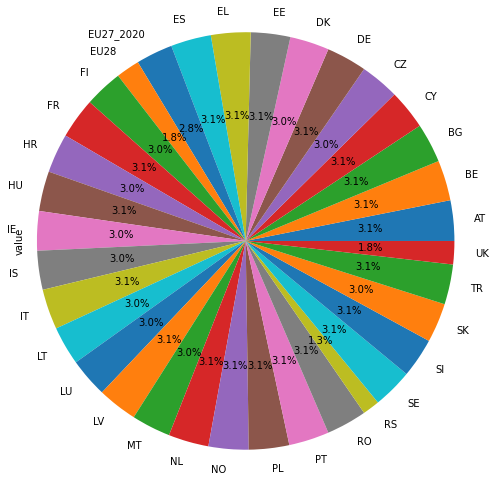

In [8]:
pieEDA_dataFruitVeg = dataFruitVeg.groupby('country')['value'].sum()
pieEDA_dataFruitVeg.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

Text(0, 0.5, 'Value/Quantity')

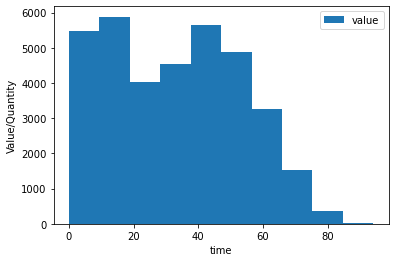

In [9]:
#dataFruitVeg.plot(kind = 'hist', x='time', figsize=(15,10))
dataFruitVeg.plot(kind = 'hist', x='time')
plt.xlabel("time")
plt.ylabel("Value/Quantity")

#### Fish and Seafood consumption dataset 

- Loading the dataset uning pandas

In [10]:
dataFish = pd.read_csv("fish-and-seafood-consumption-per-capita.csv")
dataFish.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


- Using the method .shape() to check how many columns and rows are in the dataset.

In [11]:
dataFish.shape

(11028, 4)

We can see that our Fish/Seafood dataset has 11028 rows and 4 columns.

- Using the method info() to check multiple infomrtion in the dataset. 

In [12]:
#to check data types
dataFish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          11028 non-null  object 
 1   Code                                                            9294 non-null   object 
 2   Year                                                            11028 non-null  int64  
 3   Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)  11028 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 344.8+ KB


In [13]:
dataFish.describe()

,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
count,11028.000000,11028.000000
mean,1989.461824,16.670872
std,16.320065,17.056281
min,1961.000000,0.000000
25%,1975.000000,5.340000
50%,1990.000000,11.995000
75%,2004.000000,22.512500
max,2017.000000,191.750000


- Using .value_counts() to check the amount of entries and counts of unique values.

In [14]:
#check if ireland is included
dataFish['Code'].value_counts()

AFG         57
NIC         57
MOZ         57
MMR         57
NAM         57
            ..
BEL         18
OWID_SRM    14
MNE         12
SRB         12
SDN          6
Name: Code, Length: 182, dtype: int64

- Plotting a bar to explore the type of meat in the dataset and their consumption values in percentage.

<AxesSubplot:xlabel='Code'>

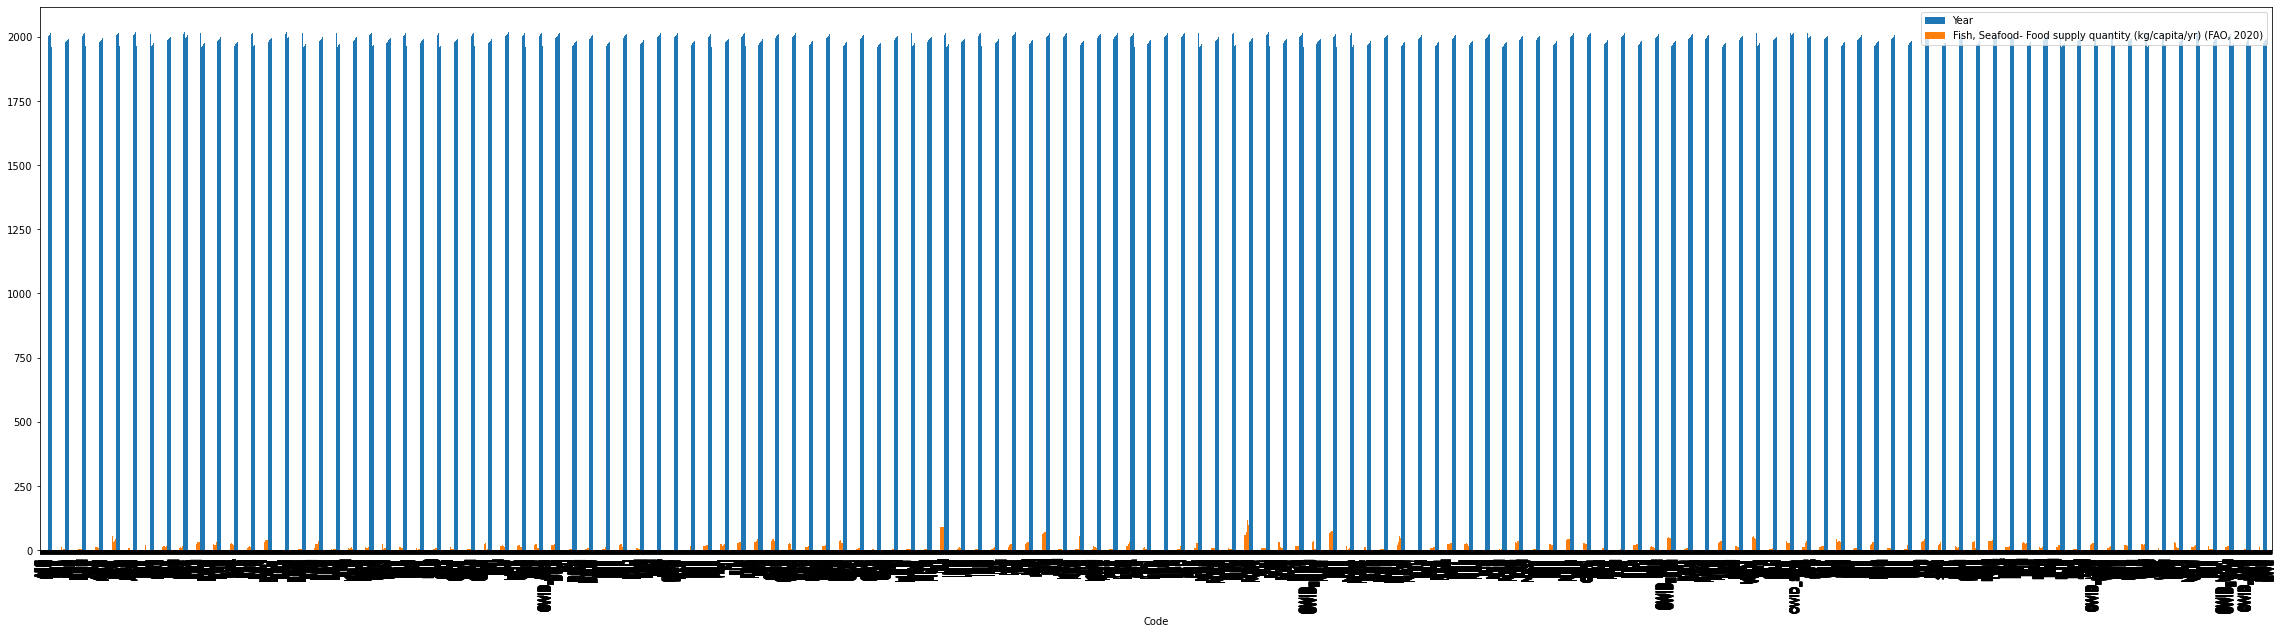

In [15]:
dataFish.plot(kind = 'bar', x='Code', figsize=(40,10))

In [16]:
#dataFish = dataFish.groupby('Code')['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'].sum()
#dataFish.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

---
#### Meat consumption dataset 

- Loading the dataset uning pandas

In [17]:
dataMeatCon = pd.read_csv("meat_consumption_worldwide.csv") 
dataMeatCon.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


- Using the method .shape() to check how many columns and rows are in the dataset.

In [18]:
dataMeatCon.shape

(13760, 5)

We can see that our Meat dataset has 13760, rows and 5 columns.

- Using the method info() to check multiple information in the dataset. 

In [19]:
#to check data types
dataMeatCon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB


In [20]:
dataMeatCon.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


- Using .value_counts() to check the amount of entries and counts of unique values.

In [21]:
dataMeatCon['LOCATION'].value_counts()

MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: LOCATION, dtype: int64

Exploring the dataset, we did not find Ireland, but we found the EU28 with 276 values. We will probably use it in the data preparation phase.

- Plotting a Pie Chart to explore the type of meat in the dataset and their consumption values in percentage.

<AxesSubplot:ylabel='Value'>

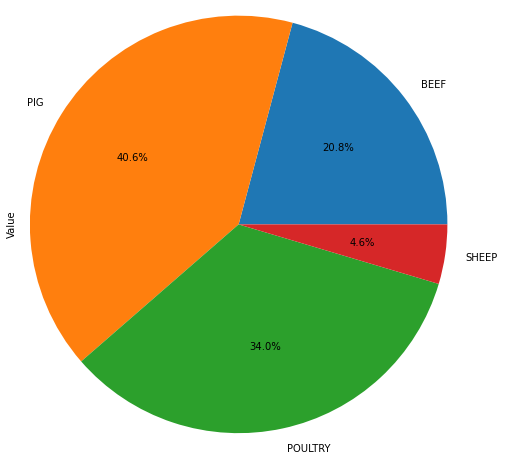

In [22]:
pieEDA_dataMeatCon = dataMeatCon.groupby('SUBJECT')['Value'].sum()
pieEDA_dataMeatCon.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

We can see in the plot above that worldwide the consumption of PIG is the highest in comparison to the other types of meat and that SHEEP is the lowest. In data preparation after cleaning the data, we will be able to check these values for EU28 and see if any change will occur.

---
#### Recipes Ingredients dataset 

- Loading the dataset uning pandas

In [23]:
dataRecipes = pd.read_csv("recipes.csv") 
dataRecipes.head()

,id,ingredients/0,ingredients/1,ingredients/2,ingredients/3,ingredients/4,ingredients/5,ingredients/6,ingredients/7,ingredients/8,...,ingredients/40,ingredients/41,ingredients/42,ingredients/43,ingredients/44,ingredients/45,ingredients/46,ingredients/47,ingredients/48,ingredients/49
0,18009,baking powder,eggs,all-purpose flour,raisins,milk,white sugar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28583,sugar,egg yolks,corn starch,cream of tartar,bananas,vanilla wafers,milk,vanilla extract,toasted pecans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41580,sausage links,fennel bulb,fronds,olive oil,cuban peppers,onions,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29752,meat cuts,file powder,smoked sausage,okra,shrimp,andouille sausage,water,paprika,hot sauce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35687,ground black pepper,salt,sausage casings,leeks,parmigiano reggiano cheese,cornmeal,water,extra-virgin olive oil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Using .shape to check how many columns and rows are in the dataset.

In [24]:
dataRecipes.shape

(9944, 51)

- Using the method .info() to check multiple information in the dataset. 

In [25]:
#to check data types
dataRecipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              9944 non-null   int64 
 1   ingredients/0   9944 non-null   object
 2   ingredients/1   9936 non-null   object
 3   ingredients/2   9888 non-null   object
 4   ingredients/3   9747 non-null   object
 5   ingredients/4   9487 non-null   object
 6   ingredients/5   9022 non-null   object
 7   ingredients/6   8342 non-null   object
 8   ingredients/7   7501 non-null   object
 9   ingredients/8   6622 non-null   object
 10  ingredients/9   5665 non-null   object
 11  ingredients/10  4748 non-null   object
 12  ingredients/11  3901 non-null   object
 13  ingredients/12  3131 non-null   object
 14  ingredients/13  2425 non-null   object
 15  ingredients/14  1871 non-null   object
 16  ingredients/15  1442 non-null   object
 17  ingredients/16  1050 non-null   object
 18  ingredie

In [26]:
dataRecipes.describe()

,id
count,9944.000000
mean,24894.350362
std,14322.958061
min,5.000000
25%,12541.000000
50%,24731.500000
75%,37113.250000
max,49715.000000


- Using .value_counts() method to check the amount of entries and counts of unique values.

In [27]:
dataRecipes.value_counts() 

id   ingredients/0  ingredients/1         ingredients/2  ingredients/3     ingredients/4  ingredients/5  ingredients/6  ingredients/7  ingredients/8  ingredients/9  ingredients/10  ingredients/11  ingredients/12  ingredients/13  ingredients/14  ingredients/15  ingredients/16     ingredients/17   ingredients/18  ingredients/19       ingredients/20       ingredients/21  ingredients/22  ingredients/23  ingredients/24  ingredients/25  ingredients/26  ingredients/27  ingredients/28  ingredients/29        ingredients/30  ingredients/31  ingredients/32  ingredients/33    ingredients/34       ingredients/35    ingredients/36        ingredients/37  ingredients/38  ingredients/39  ingredients/40  ingredients/41           ingredients/42          ingredients/43  ingredients/44  ingredients/45  ingredients/46     ingredients/47   ingredients/48  ingredients/49          
526  diced onions   yellow mustard seeds  chili pepper   crushed tomatoes  baking soda    pork ribs      shallots       coarse sal

- Checking for Outliners in the dataset

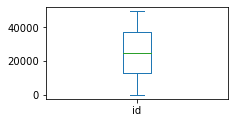

In [28]:
dataRecipes.plot(kind="box", subplots=True, figsize=(15,20), layout=(10,4))
plt.show()

- Using the method .duplicated() to check is there are any duplicate rows in the dataset

With the method .duplicated() we can see if there are duplicate rows in our dataset, but it shows that non of the 51 rows (0, 51) are duplicated.

------
#### Grocery dataset

- Loading the dataset uning pandas

In [29]:
datagrocery = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
datagrocery.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


- Using .shape to check how many columns and rows are in the dataset.

In [30]:
datagrocery.shape

(9994, 11)

- Using the method .info() to check multiple information in the dataset. 

In [31]:
datagrocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [32]:
datagrocery.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


- Using .value_counts() method to check the amount of entries and counts of unique values.

In [33]:
datagrocery['Sub Category'].value_counts()

Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: Sub Category, dtype: int64

Text(0.5, 1.0, 'Grocery - Correlation Heatmap')

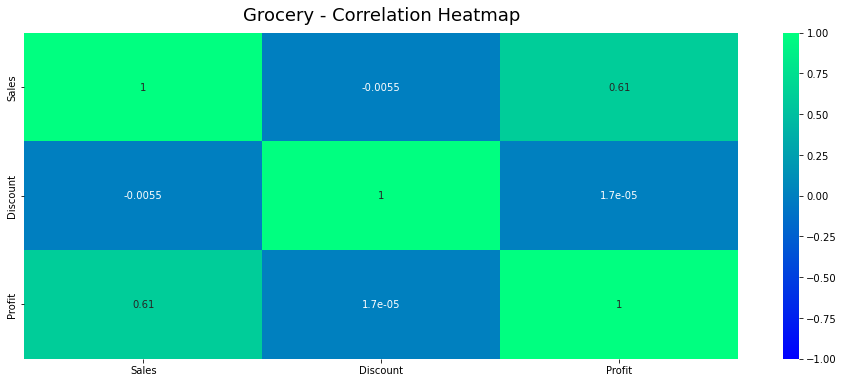

In [34]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(datagrocery.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Grocery - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

<AxesSubplot:ylabel='Sales'>

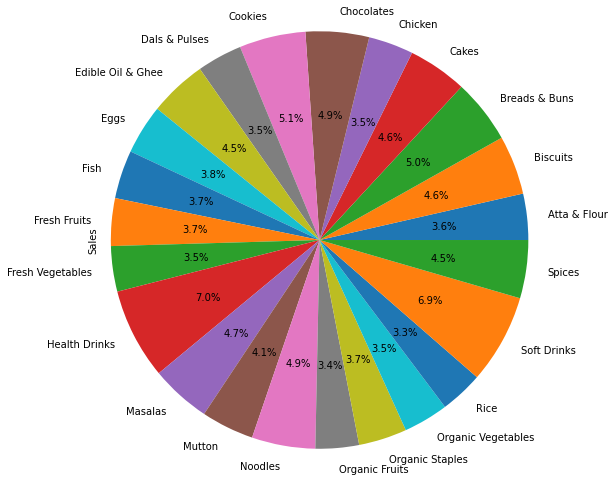

In [35]:
pieEDA_datagrocery = datagrocery.groupby('Sub Category')['Sales'].sum()
pieEDA_datagrocery.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

----
## 3. Data preparation<a name="3"></a>
----- 

#### Fruit and vegetables dataset - Preparation

In [36]:
#isolating ireland 
IEfruit = dataFruitVeg.loc[dataFruitVeg['country'] == ('IE')]
IEfruit.head()

,unit,n_portion,sex,age,country,time,value
16,PC,0,F,TOTAL,IE,2019,24.5
49,PC,0,F,Y15-19,IE,2019,NaN
82,PC,0,F,Y15-24,IE,2019,27.3
116,PC,0,F,Y15-29,IE,2019,27.9
150,PC,0,F,Y15-44,IE,2019,NaN


In [37]:
IEfruit.isnull().values.any()

True

In [38]:
#using .dropna() to remove any NA
IEfruit = IEfruit.replace('?', np.nan)
IEfruit = IEfruit.dropna()
#IEfruit = IEfruit.apply(pd.to_numeric, errors='ignore')

In [39]:
IEfruit.isnull().values.any()

False

In [40]:
duplicate_rows_IEfruit = IEfruit[IEfruit.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_IEfruit.shape)

The number of duplicate rows are:  (11, 7)


In [41]:
IEfruit1 = IEfruit.drop_duplicates()
IEfruit1.head()

,unit,n_portion,sex,age,country,time,value
16,PC,0,F,TOTAL,IE,2019,24.5
82,PC,0,F,Y15-24,IE,2019,27.3
116,PC,0,F,Y15-29,IE,2019,27.9
183,PC,0,F,Y15-64,IE,2019,26.7
281,PC,0,F,Y25-34,IE,2019,44.1


In [42]:
IEfruit1.shape

(1078, 7)

Text(1.0, 1.0, 'Ireland Fruit&Vegetables consumption')

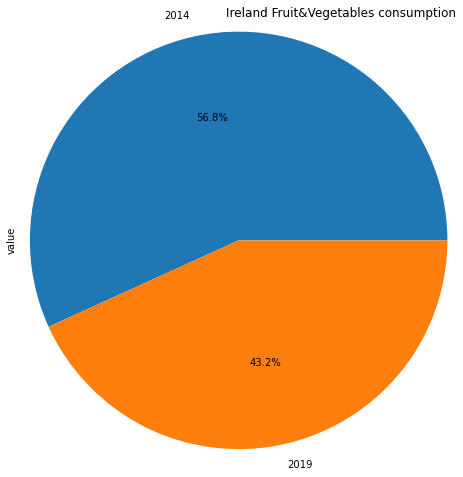

In [43]:
pieEDA_IEfruit1 = IEfruit1.groupby('time')['value'].sum()
pieEDA_IEfruit1.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("Ireland Fruit&Vegetables consumption", loc = 'right')

Text(0, 0.5, 'Value/Quantity')

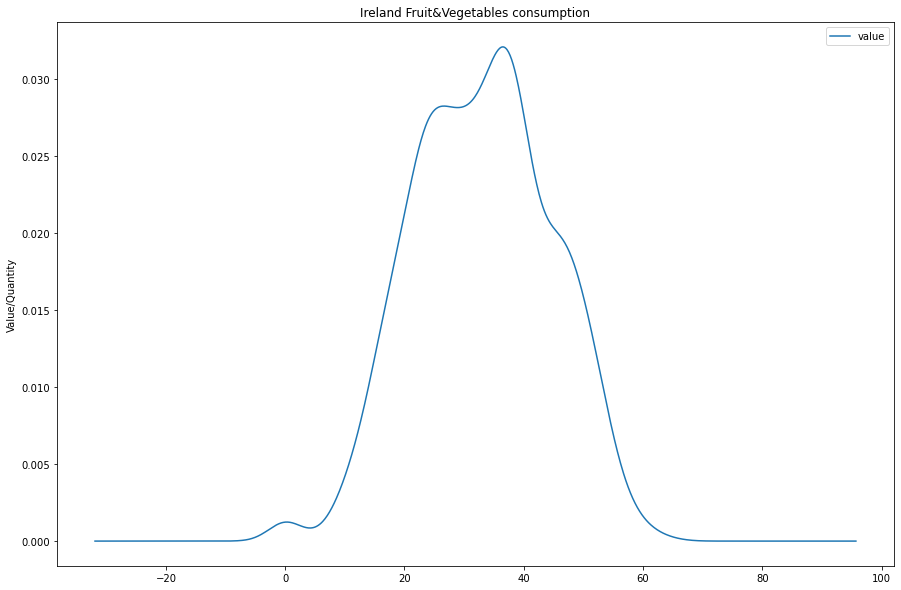

In [44]:
IEfruit1.plot(kind = 'kde', x='country', y='value', figsize=(15,10))
plt.title("Ireland Fruit&Vegetables consumption")
plt.ylabel("Value/Quantity")

Text(0.5, 1.0, 'Ireland Fruit&Vegetables consumption')

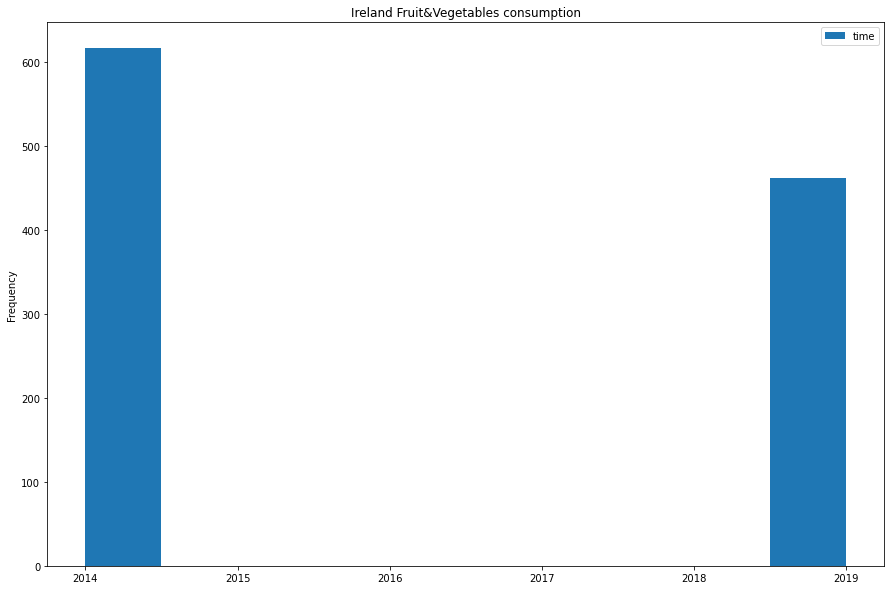

In [45]:
IEfruit1.plot(kind = 'hist', x='country', y='time',figsize=(15,10))
plt.title("Ireland Fruit&Vegetables consumption")

Text(0.5, 1.0, 'Fruit&Vegetables - Correlation Heatmap')

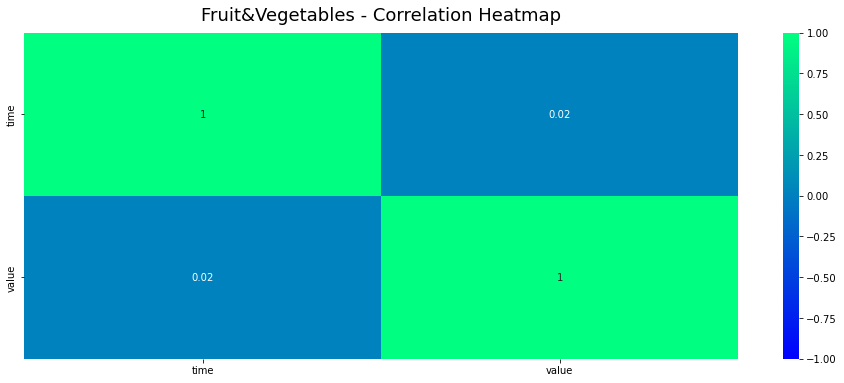

In [46]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(IEfruit1.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Fruit&Vegetables - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

---------
#### Fish and Seafood dataset - Preparation

In [47]:
dataFish1 = dataFish

In [48]:
dataFish1.isnull().values.any()

True

In [49]:
#using .dropna() to remove any NA
dataFish1 = dataFish1.replace('?', np.nan)
dataFish1 = dataFish1.dropna()
#dataFish1 = dataFish1.apply(pd.to_numeric, errors='ignore')

In [50]:
dataFish1.isnull().values.any()

False

In [51]:
dataFish1.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


In [52]:
dataFish1.shape

(9294, 4)

In [53]:
duplicate_rows_dataFish = dataFish1[dataFish1.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFish.shape)

The number of duplicate rows are:  (0, 4)


In [54]:
dataFish1.set_index('Entity', inplace=True)

In [55]:
#Checking a particular row
print(dataFish1.loc['Ireland'])

        Code  Year  \
Entity               
Ireland  IRL  1961   
Ireland  IRL  1962   
Ireland  IRL  1963   
Ireland  IRL  1964   
Ireland  IRL  1965   
Ireland  IRL  1966   
Ireland  IRL  1967   
Ireland  IRL  1968   
Ireland  IRL  1969   
Ireland  IRL  1970   
Ireland  IRL  1971   
Ireland  IRL  1972   
Ireland  IRL  1973   
Ireland  IRL  1974   
Ireland  IRL  1975   
Ireland  IRL  1976   
Ireland  IRL  1977   
Ireland  IRL  1978   
Ireland  IRL  1979   
Ireland  IRL  1980   
Ireland  IRL  1981   
Ireland  IRL  1982   
Ireland  IRL  1983   
Ireland  IRL  1984   
Ireland  IRL  1985   
Ireland  IRL  1986   
Ireland  IRL  1987   
Ireland  IRL  1988   
Ireland  IRL  1989   
Ireland  IRL  1990   
Ireland  IRL  1991   
Ireland  IRL  1992   
Ireland  IRL  1993   
Ireland  IRL  1994   
Ireland  IRL  1995   
Ireland  IRL  1996   
Ireland  IRL  1997   
Ireland  IRL  1998   
Ireland  IRL  1999   
Ireland  IRL  2000   
Ireland  IRL  2001   
Ireland  IRL  2002   
Ireland  IRL  2003   
Ireland  I

In [56]:
#isolate IRL Ireland 
IEdataFish = dataFish1.loc[dataFish1['Code'] == ('IRL')]
IEdataFish.head()

,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
Entity,,,
Ireland,IRL,1961,7.10
Ireland,IRL,1962,7.28
Ireland,IRL,1963,8.12
Ireland,IRL,1964,8.59
Ireland,IRL,1965,9.56


Text(0.5, 1.0, 'Ireland Fish&Seafood consumption')

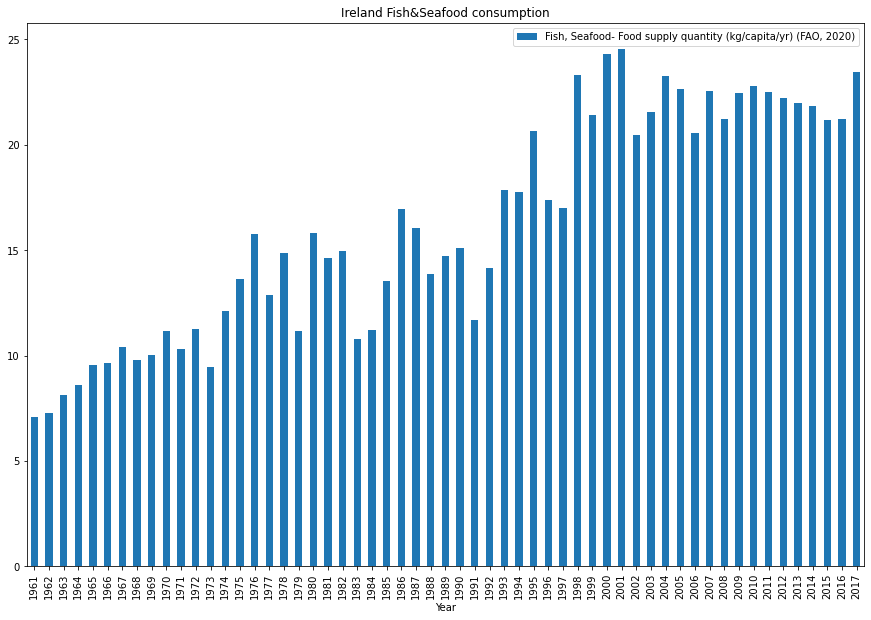

In [57]:
IEdataFish.plot(kind = 'bar', x='Year', figsize=(15,10))
plt.title("Ireland Fish&Seafood consumption")

Text(1.0, 1.0, 'Ireland Fish&Seafood consumption')

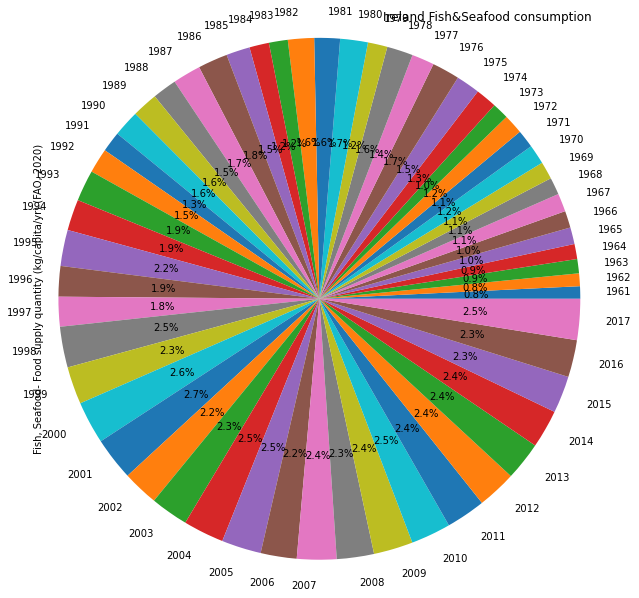

In [58]:
pieEDA_IEdataFish = IEdataFish.groupby('Year')['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'].sum()
pieEDA_IEdataFish.plot.pie(figsize=(10,10), radius=1.2, autopct='%1.1f%%')
plt.title("Ireland Fish&Seafood consumption", loc = 'right')

Text(0.5, 1.0, 'Fish&Seafood - Correlation Heatmap')

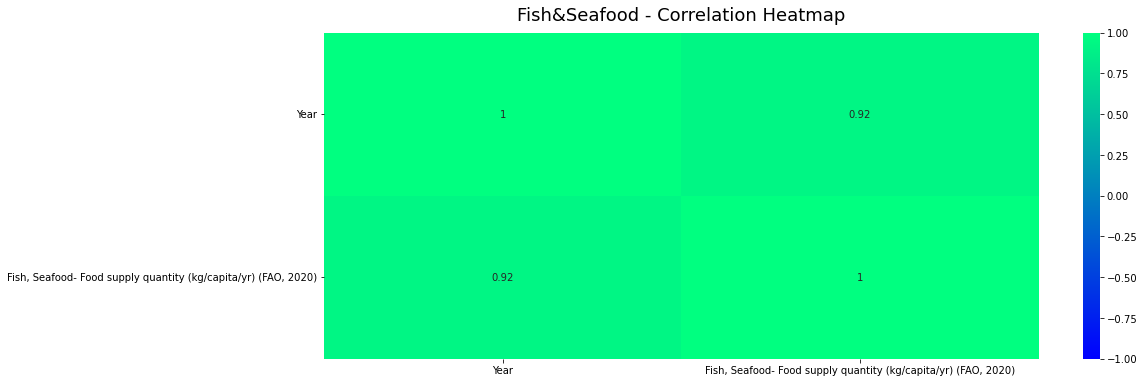

In [59]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(IEdataFish.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Fish&Seafood - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

----
#### Meat consumption dataset - Preparation
(by different types of meat)

In [85]:
dataMeatCon1 = dataMeatCon

In [86]:
dataMeatCon1.isnull().values.any()

False

In [87]:
#isolate EU 
EUdataMeatcon = dataMeatCon1.loc[dataMeatCon1['LOCATION'] == ('EU28')]
EUdataMeatcon.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
6580,EU28,BEEF,KG_CAP,2000,12.677364
6581,EU28,BEEF,KG_CAP,2001,12.009464
6582,EU28,BEEF,KG_CAP,2002,12.535008
6583,EU28,BEEF,KG_CAP,2003,12.314197
6584,EU28,BEEF,KG_CAP,2004,12.520383


In [80]:
duplicate_rows_EUdataMeatcon = EUdataMeatcon[EUdataMeatcon.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_EUdataMeatcon.shape)

The number of duplicate rows are:  (0, 5)


Text(0.0, 1.0, 'EU28 Meat consumption')

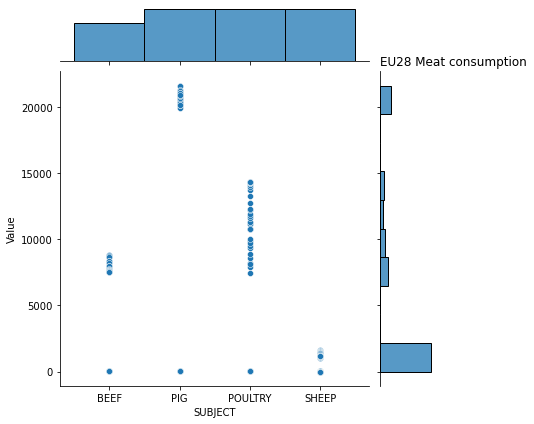

In [81]:
#sns.distplot(EUdataMeatcon.TIME)
sns.jointplot(x="SUBJECT", y="Value", data=EUdataMeatcon);
plt.title("EU28 Meat consumption", loc='left')

- Plotting using Pie to explore the consumption in EU28

Text(0.0, 1.0, 'EU28 Meat consumption')

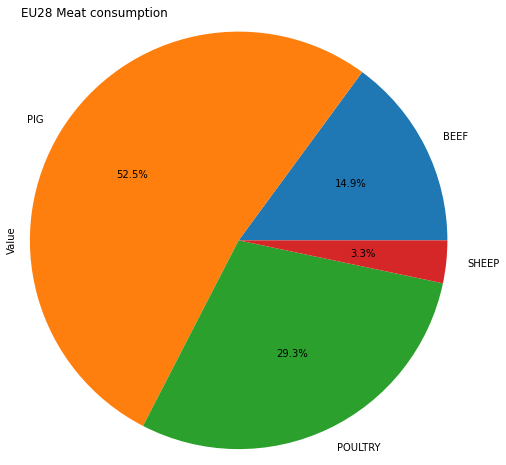

In [63]:
dataMeatPie1 = EUdataMeatcon.groupby('SUBJECT')['Value'].sum()
dataMeatPie1.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("EU28 Meat consumption", loc='left')

We see that the above plot has a different result in comparison the same graphic worldwide figures.
Here we can see that EU28 consumes more PIG and less BEEF in comparison with the worldwide figures.

Text(0.5, 1.0, 'Meat - Correlation Heatmap')

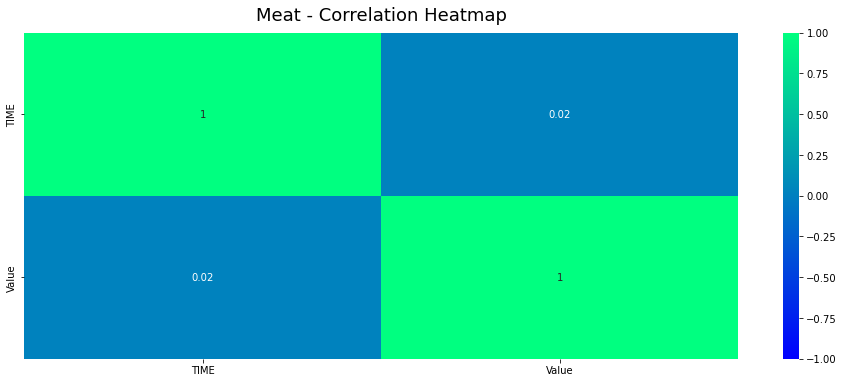

In [64]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(EUdataMeatcon.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Meat - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

----
#### Ingredients based on recipes dataset - Preparation

In [83]:
dataRecipes1 = dataRecipes

In [84]:
dataRecipes1.isnull().values.any()

True

In [88]:
#using .dropna() to remove any NA
dataRecipes1 = dataRecipes1.replace('?', np.nan)
dataRecipes1 = dataRecipes1.dropna()
#dataFish1 = dataFish1.apply(pd.to_numeric, errors='ignore')

In [89]:
dataRecipes1.isnull().values.any()

False

In [90]:
duplicate_rows_dataRecipes = dataRecipes[dataRecipes.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataRecipes.shape)

The number of duplicate rows are:  (0, 51)


Text(0.5, 1.0, 'Recipes - Correlation Heatmap')

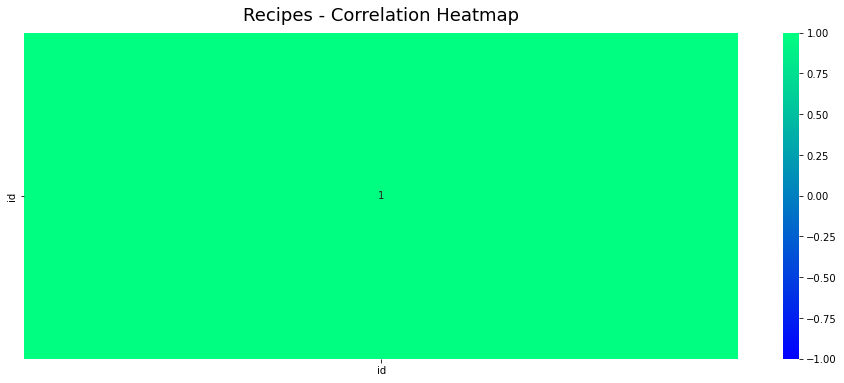

In [91]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(dataRecipes.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Recipes - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

----
## 4. Modelling<a name="4"></a>
----